<a href="https://colab.research.google.com/github/anjali-ds-03/Deep-Learning/blob/main/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# change the data type of TotalCharges from object to numeric
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.fillna(data['TotalCharges'].median(), inplace=True)

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
numericals=['tenure','MonthlyCharges','TotalCharges']
data[numericals].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


<Axes: xlabel='Churn', ylabel='Count'>

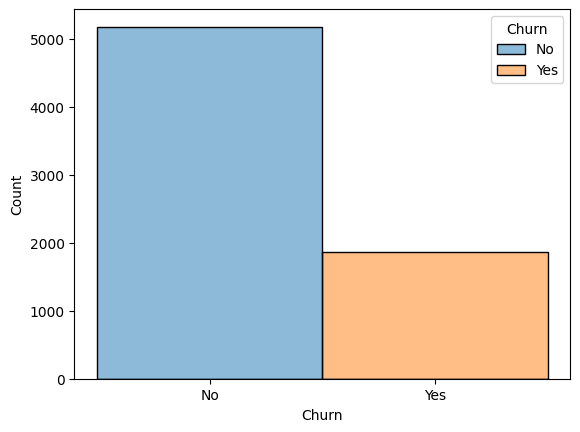

In [ ]:
sns.histplot(data, x='Churn', hue= 'Churn')

<Axes: xlabel='TotalCharges', ylabel='Count'>

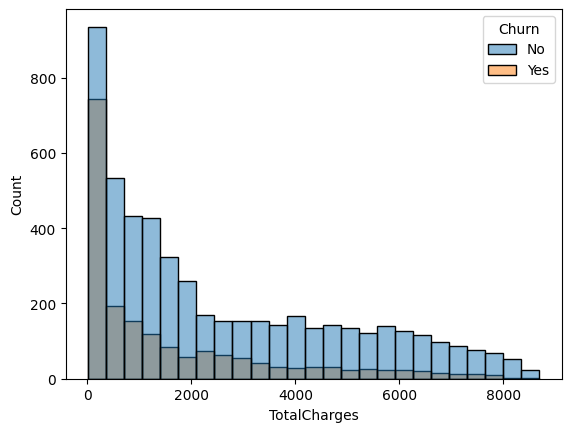

In [ ]:
sns.histplot(data, x='TotalCharges', hue='Churn')

<Axes: xlabel='tenure', ylabel='Count'>

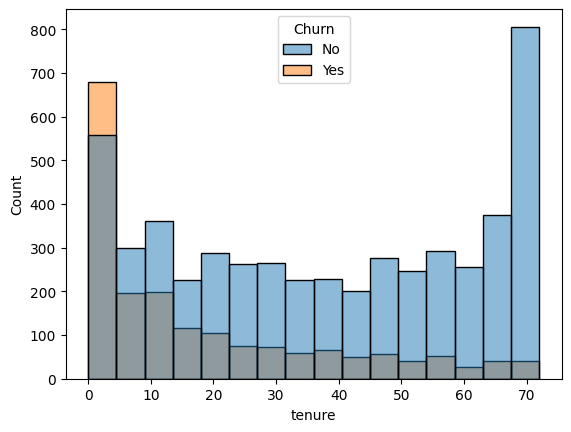

In [ ]:
sns.histplot(data, x='tenure',hue='Churn')

<ipython-input-16-e9991c14456d>:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend('Not Churn', 'Churn')


Text(0.5, 1.0, 'Monthly Charges Vs Churn')

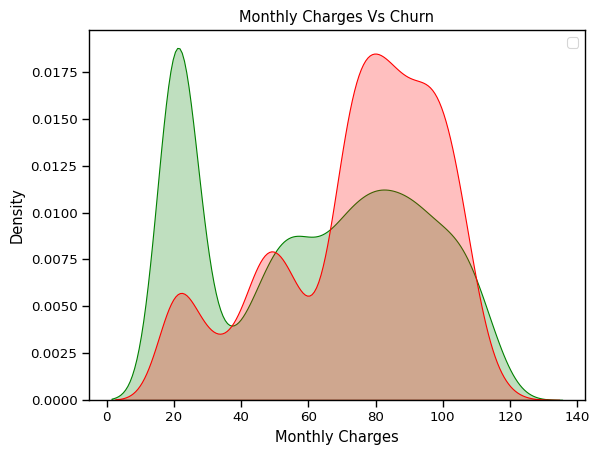

In [ ]:
sns.set_context('paper', font_scale=1.1)
ax=sns.kdeplot(data.MonthlyCharges[(data['Churn']=='No')], color='Green', fill=True)
ax=sns.kdeplot(data.MonthlyCharges[(data['Churn']=='Yes')], color='Red', fill=True)
ax.legend('Not Churn', 'Churn')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Monthly Charges Vs Churn')

<Axes: xlabel='TotalCharges', ylabel='Density'>

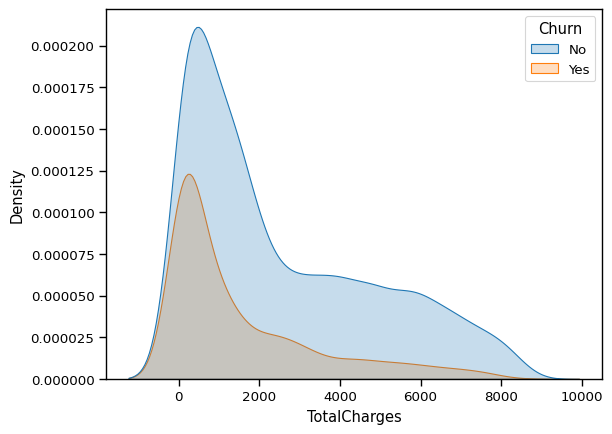

In [ ]:
sns.kdeplot(data=data, x='TotalCharges',hue= 'Churn' ,fill=True)

<Axes: xlabel='TotalCharges', ylabel='Density'>

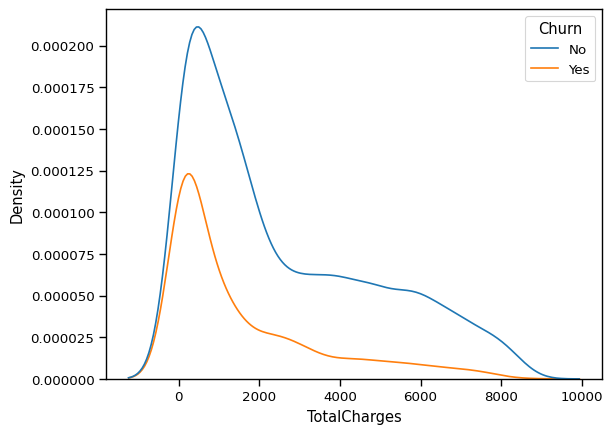

In [ ]:

sns.kdeplot(data=data, x='TotalCharges', hue="Churn")

<Axes: >

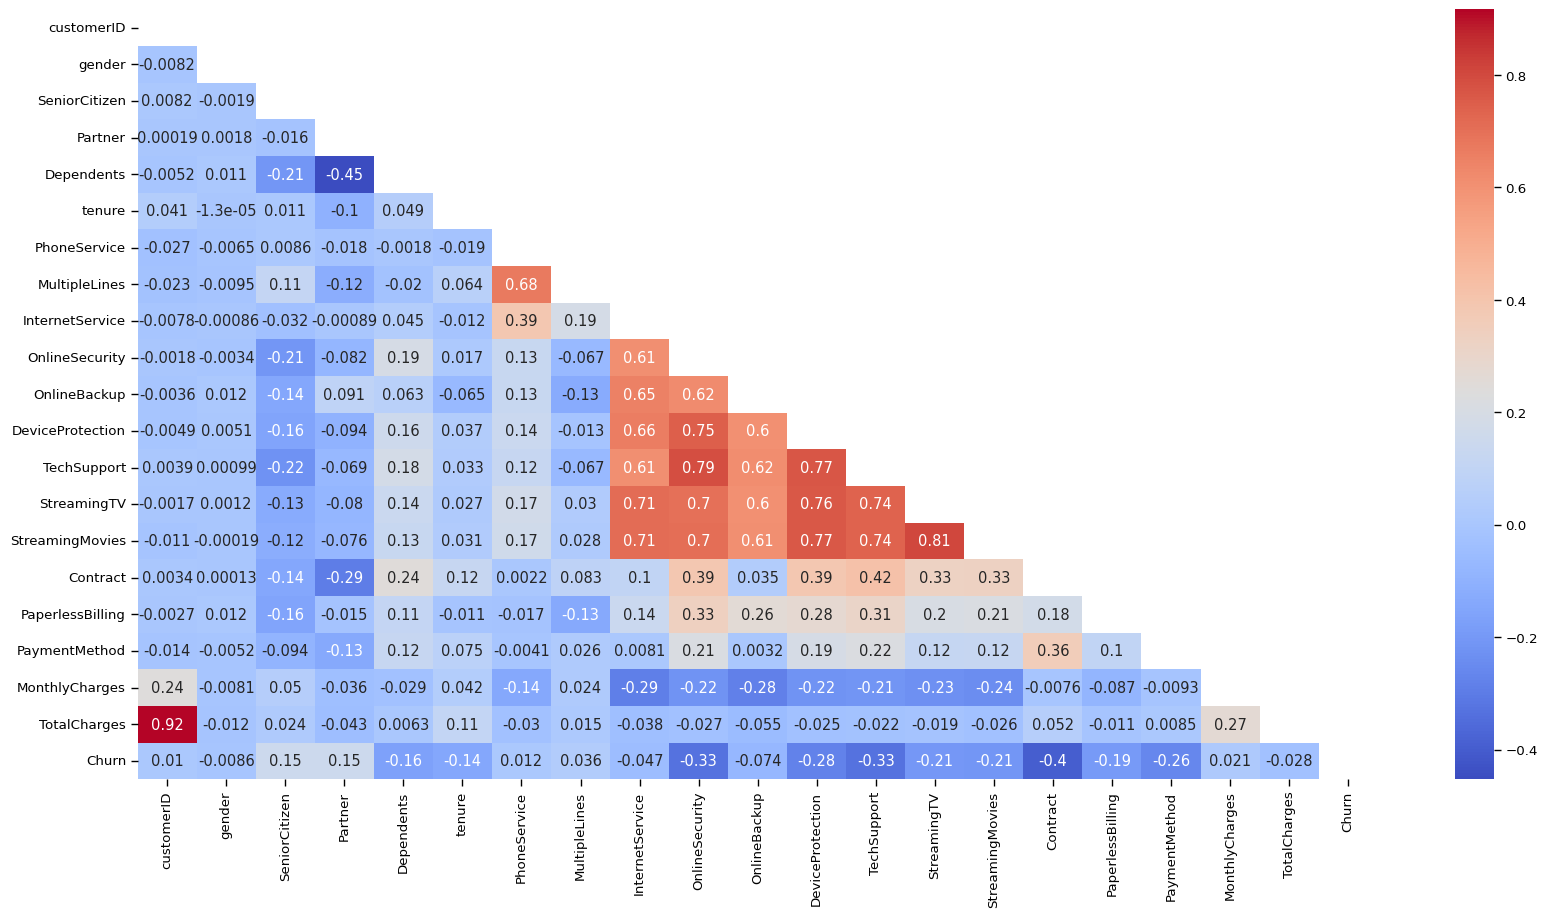

In [ ]:
plt.figure(figsize=(20,10))
correlation=data.apply(lambda x:pd.factorize(x)[0]).corr()
mask=np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation,mask=mask ,xticklabels= correlation.columns , yticklabels=correlation.columns, annot=True,cmap='coolwarm')


<Axes: >

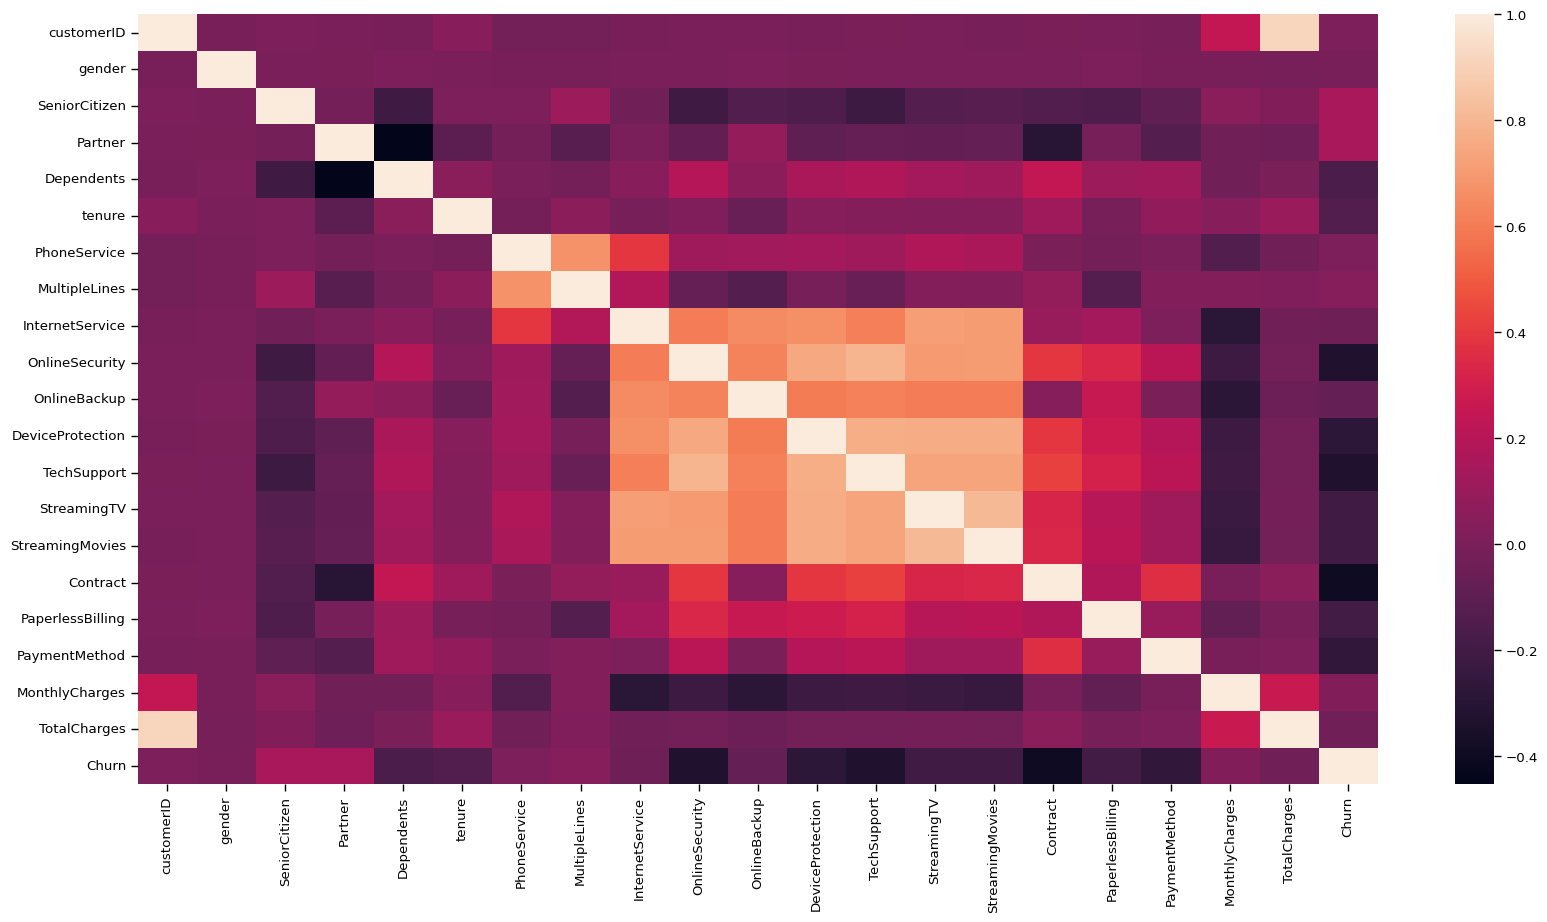

In [ ]:
plt.figure(figsize=(20,10))
correlation=data.apply(lambda x:pd.factorize(x)[0]).corr()
sns.heatmap(correlation ,xticklabels= correlation.columns , yticklabels=correlation.columns)


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
def convertor(dataframe_series):
  if dataframe_series.dtype=='object':
    dataframe_series=LabelEncoder().fit_transform(dataframe_series)
  return dataframe_series

In [ ]:
data=data.apply(lambda x: convertor(x))

In [ ]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1
7042,2226,1,0,0,0,66,1,0,1,2,...,2,2,2,2,2,1,0,105.65,6844.50,0


In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
data.corr()['Churn'].sort_values()

,Churn
Contract,-0.396713
tenure,-0.352229
OnlineSecurity,-0.289309
TechSupport,-0.282492
TotalCharges,-0.199037
OnlineBackup,-0.195525
DeviceProtection,-0.178134
Dependents,-0.164221
Partner,-0.150448
InternetService,-0.047291


In [ ]:
x=data.drop(columns=['Churn'])
y=data['Churn'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test , y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler= StandardScaler()
data_std=pd.DataFrame(scaler.fit_transform(data[numericals].astype('float64')), columns= numericals)

In [ ]:
x_train[numericals]=scaler.fit_transform(x_train[numericals])
x_test[numericals]=scaler.transform(x_test[numericals])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
model= RandomForestClassifier(min_samples_split=17, n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=17)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

